In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import music21
import warnings

warnings.filterwarnings('ignore')

In [3]:

def estimate_tempo(filename):
    y, sr = librosa.load(filename, sr=None)
    tempo, _ = librosa.beat.beat_track(y, sr=sr)
    return tempo


In [4]:

def plot_beat(filename):
    y, sr = librosa.load(filename, sr=None)
    tempo, beats = librosa.beat.beat_track(y, sr=sr)
    times = librosa.frames_to_time(beats, sr=sr)
    start = np.random.randint(0, len(y) - sr*10)
    end = start + sr*10
    plt.figure(figsize=(15,5))
    plt.title('Waveform with Beat Markers')
    t = np.linspace(0, len(y)/sr, len(y))
    plt.plot(t, y, alpha=0.8)
    plt.xlim(start/sr, end/sr)
    plt.vlines(times[(times >= start/sr) & (times < end/sr)], -1, 1, color='r')
    plt.show()
    

In [5]:

def estimate_key(filename):
    y, sr = librosa.load(filename, sr=None)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    pitches = np.argmax(chroma, axis=0)
    stream = music21.stream.Stream()
    for p in pitches:
        n = music21.note.Note()
        n.pitch.midi = p
        stream.append(n)
    key = stream.analyze('key')
    return key.tonic.name, key.mode


Tempo of music\Charlie Tadman - Lost Your Mind.mp3: 123.05 BPM
Estimated key of music\Charlie Tadman - Lost Your Mind.mp3: C# major


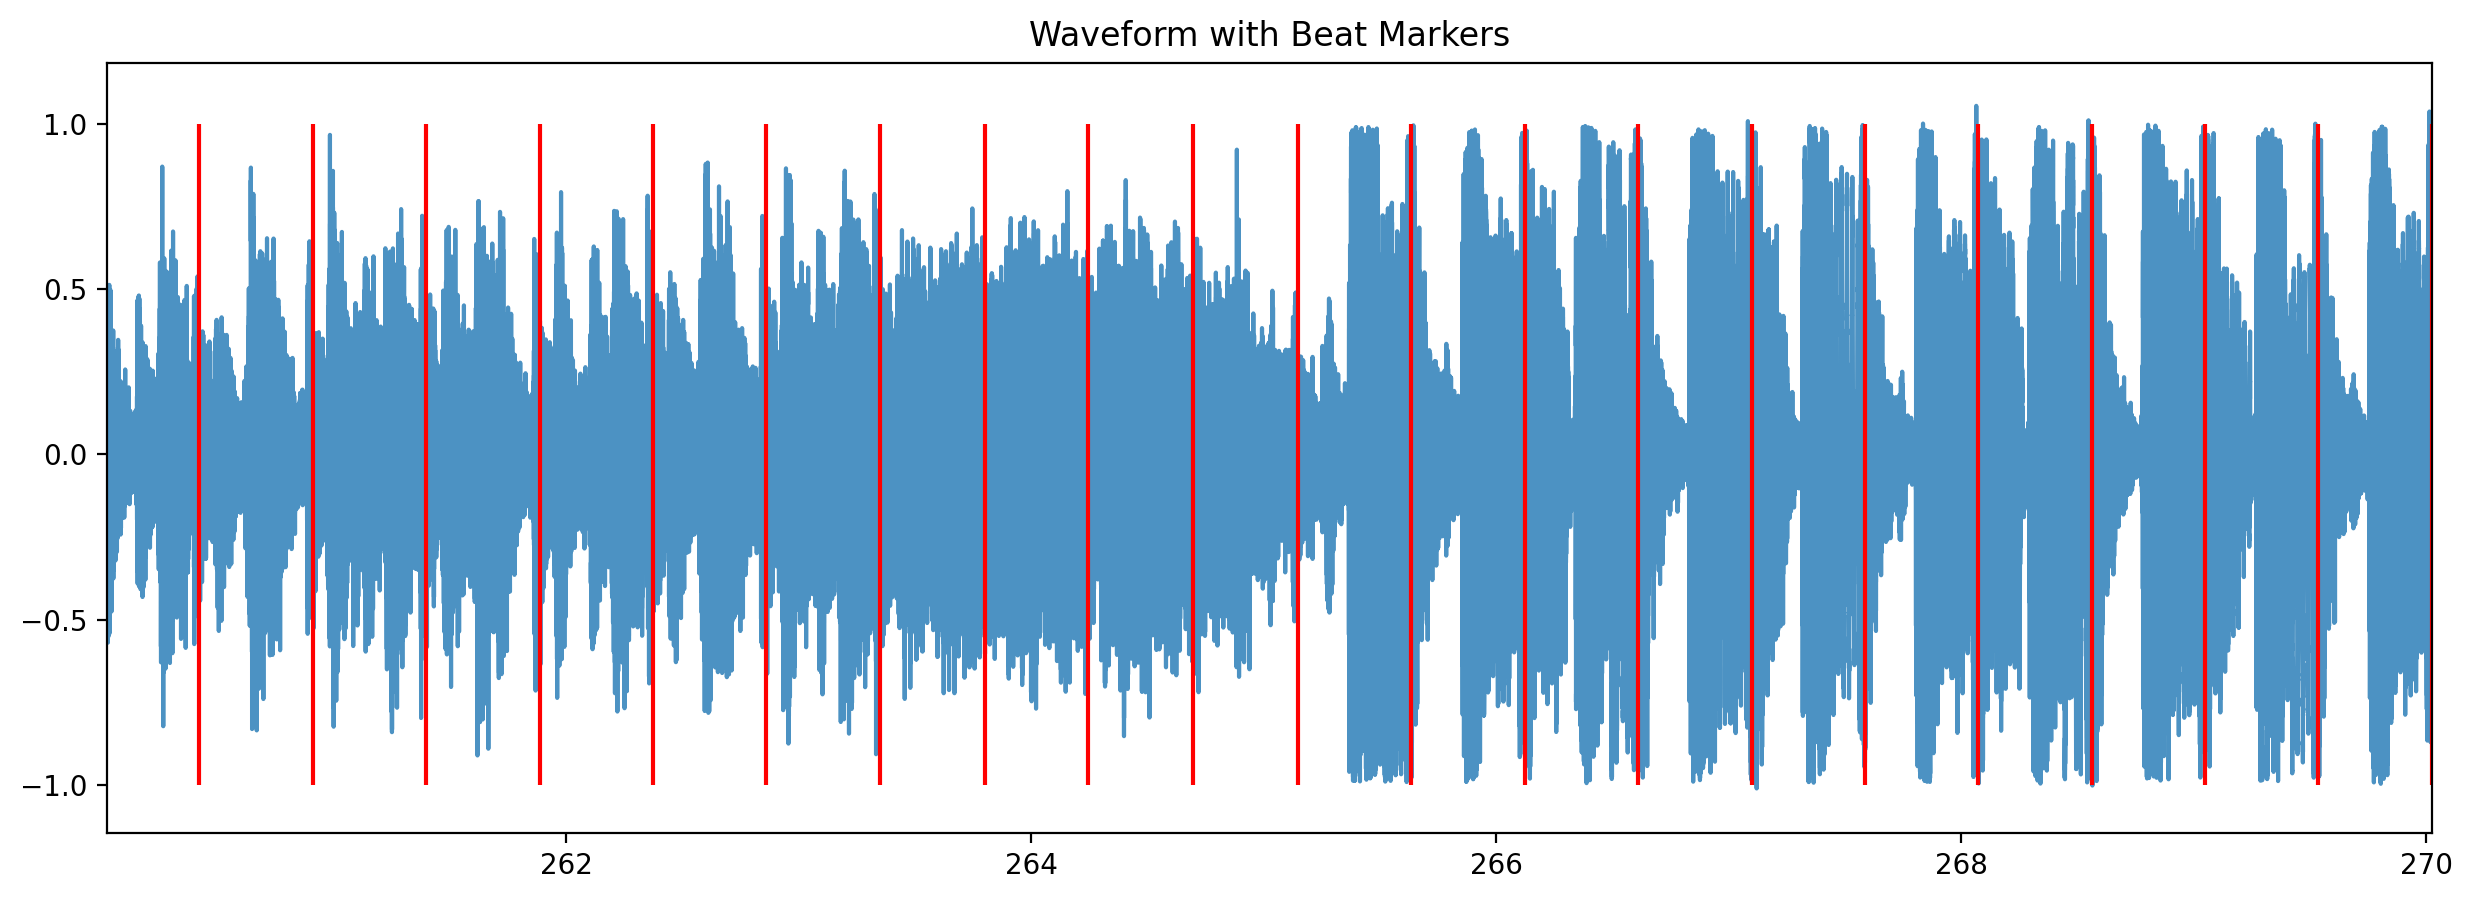

In [7]:

filename = 'music\Charlie Tadman - Lost Your Mind.mp3'
tempo = estimate_tempo(filename)
key, mode = estimate_key(filename)
print(f'Tempo of {filename}: {tempo:.2f} BPM')
print(f'Estimated key of {filename}: {key} {mode}')
plot_beat(filename)
